In [1]:
import tensorcircuit as tc
from random import random
from numpy import pi,sqrt
from matplotlib import pyplot as plt
import tensorflow as tf

K = tc.set_backend('tensorflow')

n,m,p=0,0,0
edges=[]
def u_beta(c, beta):
    for i in range(n):
        c.rx(i, theta = beta)
def u_gamma(c, gamma):
    for e in edges:
        x, y = e
        c.rzz(x, y, theta = gamma)
def loss_cell(params):
    betas, gammas = params[:p],params[p:]
    c = tc.Circuit(n);
    for i in range(n): c.h(i)
    for i in range(p):
        u_gamma(c, gammas[i])
        u_beta(c, betas[i])
    return c
def loss(params):
    c = loss_cell(params)
    Loss = K.real(0.);
    for e in edges: Loss += K.real(c.expectation_ps(z=e))
    return Loss

opt = K.optimizer(tf.keras.optimizers.Adagrad())

2022-07-27 17:18:37.056632: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-27 17:18:37.056649: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-07-27 17:18:38.831175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-27 17:18:38.831193: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 17:18:38.831203: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (imasonliu-LC11): /proc/driver/nvidia/version does not exist
2022-07-27 17:18:38.831353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


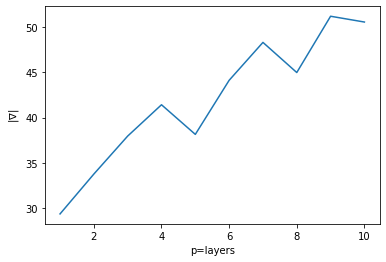

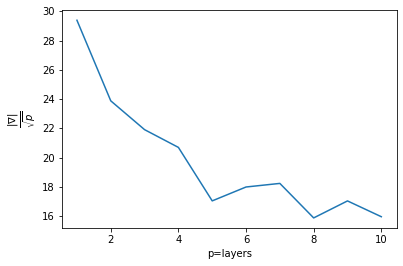

In [2]:
y_arrs=[0.]*10
for graph in range(10):
    n=6
    m=int(random()*n+n)
    edges=[]
    for i in range(m):
        e=[0,0]
        while e[0]==e[1]: e=[int(random()*n),int(random()*n)]
        edges.append(e)

    for P in range(1,11):
        p=P
        params = tf.convert_to_tensor([[random()*2*pi for i in range(2*p)] for j in range(10)])
    #     print(params)
        QAOA_vvag = tc.backend.vvag(loss)
        Loss, grads = QAOA_vvag(params)
    #     print(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))
        y_arrs[P-1]+=(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))/10
#     print(graph)
    
plt.clf()
plt.plot([*range(1,11)],y_arrs)
plt.xlabel("p=layers")
plt.ylabel(r"$|\nabla|$")
plt.show()

plt.clf()
plt.plot([*range(1,11)],[y_arrs[i]/sqrt(i+1) for i in range(len(y_arrs))])
plt.xlabel("p=layers")
plt.ylabel(r"$\dfrac{|\nabla|}{\sqrt{p}}$")
plt.show()

可以看出，$n$增大时，梯度会变大，但是梯度平方平均值会变小。

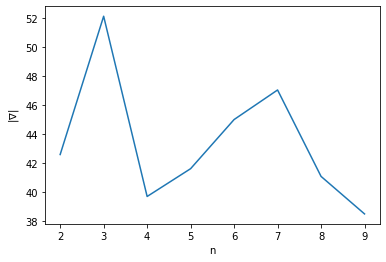

In [3]:
y_arrs=[0.]*8
p=4
for N in range(2,10):
    n=N
    for graph in range(4):
        m=int(random()*n+n)
        edges=[]
        for i in range(m):
            e=[0,0]
            while e[0]==e[1]: e=[int(random()*n),int(random()*n)]
            edges.append(e)

        params = tf.convert_to_tensor([[random()*2*pi for i in range(2*p)] for j in range(10)])
    #     print(params)
        QAOA_vvag = tc.backend.vvag(loss)
        Loss, grads = QAOA_vvag(params)
    #     print(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))
        y_arrs[N-2]+=(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))/4
#     print(N)
    
plt.clf()
plt.plot([*range(2,10)],y_arrs)
plt.xlabel("n")
plt.ylabel(r"$|\nabla|$")
plt.show()

无明显规律。

In [4]:

def u_beta(c, beta):
    for i in range(n):
        c.rx(i, theta = beta[i])
def u_gamma(c, gamma):
    cnt=0
    for e in edges:
        x, y = e
        c.rzz(x, y, theta = gamma[cnt])
        cnt+=1
def loss_cell(params):
    betas, gammas = params[:p*n],params[p*n:]
    c = tc.Circuit(n);
    for i in range(n): c.h(i)
    for i in range(p):
        u_gamma(c, gammas[:len(edges)])
        u_beta(c, betas[:n])
        gammas,betas=gammas[len(edges):],betas[n:]
    return c
def loss(params):
    c = loss_cell(params)
    Loss = K.real(0.);
    for e in edges: Loss += K.real(c.expectation_ps(z=e))
    return Loss

opt = K.optimizer(tf.keras.optimizers.Adagrad())

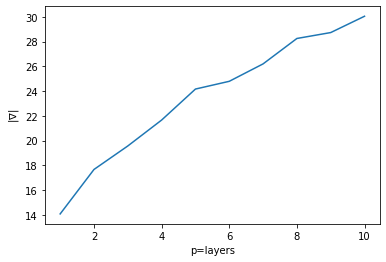

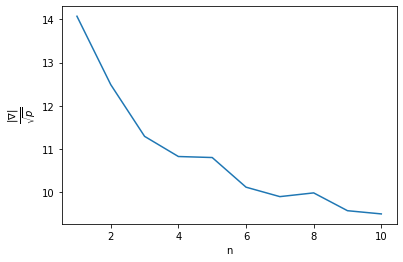

In [5]:
y_arrs=[0.]*10
for graph in range(10):
    n=6
    m=int(random()*n+n)
    edges=[]
    for i in range(m):
        e=[0,0]
        while e[0]==e[1]: e=[int(random()*n),int(random()*n)]
        edges.append(e)

    for P in range(1,11):
        p=P
        params = tf.convert_to_tensor([[random()*2*pi for i in range((n+m)*p)] for j in range(10)])
    #     print(params)
        QAOA_vvag = tc.backend.vvag(loss)
        Loss, grads = QAOA_vvag(params)
    #     print(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))
        y_arrs[P-1]+=(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))/10
#     print(graph)
    
plt.clf()
plt.plot([*range(1,11)],y_arrs)
plt.xlabel("p=layers")
plt.ylabel(r"$|\nabla|$")
plt.show()

plt.clf()
plt.plot([*range(1,11)],[y_arrs[i]/sqrt(i+1) for i in range(len(y_arrs))])
plt.xlabel("n")
plt.ylabel(r"$\dfrac{|\nabla|}{\sqrt{p}}$")
plt.show()

梯度变化和单参数情况一致，但是梯度相对更小。

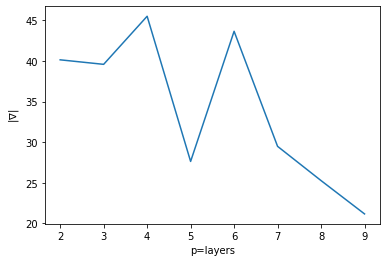

In [6]:
y_arrs=[0.]*8
for N in range(2,10):
    n=N
    for graph in range(4):
        m=int(random()*n+n)
        edges=[]
        for i in range(m):
            e=[0,0]
            while e[0]==e[1]: e=[int(random()*n),int(random()*n)]
            edges.append(e)

        params = tf.convert_to_tensor([[random()*2*pi for i in range((n+m)*p)] for j in range(10)])
    #     print(params)
        QAOA_vvag = tc.backend.vvag(loss)
        Loss, grads = QAOA_vvag(params)
    #     print(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))
        y_arrs[N-2]+=(sqrt(sum([sum([j*j for j in i]) for i in grads.numpy()])))/4
#    print(N)
    
plt.clf()
plt.plot([*range(2,10)],y_arrs)
plt.xlabel("p=layers")
plt.ylabel(r"$|\nabla|$")
plt.show()

总结：初始梯度规律和$n$关系不大，与$p$有明显关系。

在$n$较大时，$p$若较小会无法较好优化，$p$若较大则可能使梯度过小。